In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
from astropy.io import ascii



In [2]:
hdu = fits.open("../spectra_luis/s27s07_1D_aberturaOIII.fits")

In [3]:
hdu.info()

Filename: ../spectra_luis/s27s07_1D_aberturaOIII.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     250   ()      
  1  SCI           1 ImageHDU       147   (3227,)   float64   
  2  VAR           1 ImageHDU       147   (3227,)   float64   
  3  DQ            1 ImageHDU       147   (3227,)   int16 (rescales to uint16)   
  4  PROVENANCE    1 BinTableHDU     17   12R x 4C   [28A, 128A, 128A, 128A]   
  5  PROVHISTORY    1 BinTableHDU     17   24R x 4C   [128A, 398A, 28A, 28A]   


In [4]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
INSTRUME= 'GMOS-S  '           / Instrument used to acquire data                
SEQEXVER= '20221122-2ed59215'  / Seqexec version                                
OBJECT  = 's27s07.015037'      / Object Name                                    
OBSTYPE = 'OBJECT  '           / Observation type                               
OBSCLASS= 'science '           / Observe class                                  
GEMPRGID= 'GS-2022B-FT-210'    / Gemini programme ID                            
OBSID   = 'GS-2022B-FT-210-9

In [5]:
# Wavelenght
nx, wav0, i0, dwav = [hdu[1].header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1", "CD1_1")]
wavs = wav0 + (np.arange(nx) - (i0 - 1)) * dwav
wavs

array([423.23645061, 423.33739609, 423.43834157, ..., 748.68467517,
       748.78562065, 748.88656613])

In [6]:
flux = hdu[1].data
flux

array([0.00000000e+00, 3.79379317e-18, 3.27688985e-18, ...,
       1.07012202e-18, 8.46498139e-19, 0.00000000e+00], dtype='>f8')

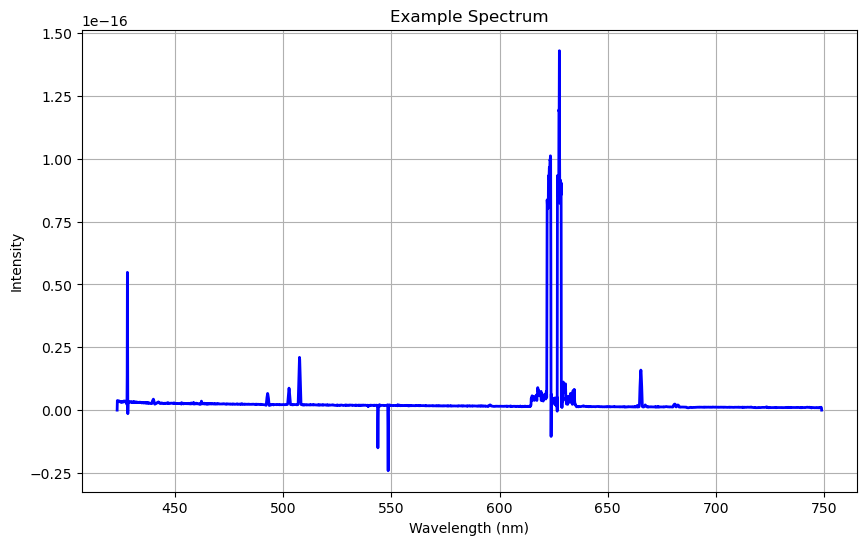

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavs, flux, color='blue', linewidth=2)
plt.title('Example Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

In [8]:
data = ascii.read("../Spectra_txt/n13s01_new_apOIII.txt", format='basic', delimiter=' ')

In [10]:
wavelengths_nm = data.columns[0].data  # Assuming the first column is wavelengths in nm
flux1 = data.columns[1].data  # Assuming the second column is flux

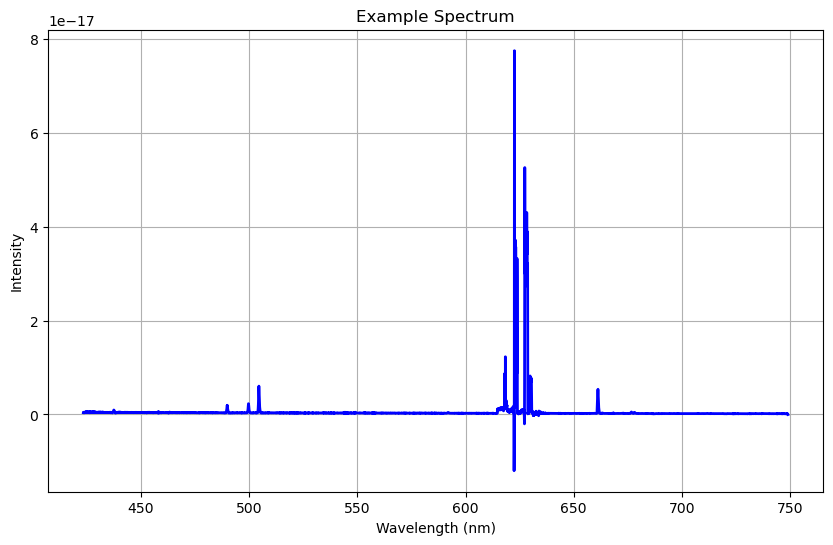

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths_nm, flux1, color='blue', linewidth=2)
plt.title('Example Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()